# Basic Elements of Information Theory

Probability Theory allows to deal with the uncertain, however, it does
not allow to quantify it. Information theory provides the tools to
**quantify how much information is present in a signal**.

When dealing with data, it can be useful to understand which data is
informative and which is not, with respect to a given goal.

The basic intuition behind information theory is that learning an
unlikely event has occurred is more informative than learning a likely
event has occurred.

For instance, the event "the sun rose this morning" is very likely and
hence it is not very informative. The message "there was a solar eclipse
this morning" is instead very unlikely, and hence informative.

## Self-information

We would like to quantify information in a way that formalizes the
intuition discussed before:

-   Likely events should have *low information content*

-   Less likely events should have *higher information content*

Moreover, **independent events should have additive
        information**. For example, finding out that a tossed coin has
        come up as heads twice should convey twice as much information
        as finding out that a tossed coin has come up as heads once.

To satisfy these three properties, the notion of **self-information** is
introduced. Given a random variable $X \sim P$, the self-information of
an event $X = x$ is defined as:

$$I(x) = - logP(x)$$

If the base of the logarithm is 2, then the self-information is measured
in **bits**.

If the base of the logarithm is e, then the self-information is measures
in **nats.**

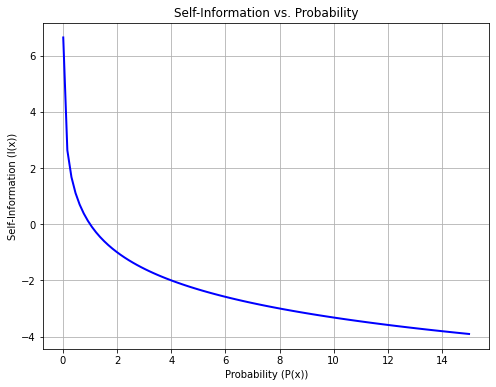

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of probabilities
probabilities = np.linspace(0.01, 15, 100)  # From 0.01 to 1 with 100 points

# Calculate self-information for each probability
self_information = -np.log2(probabilities)

# Create the self-information plot
plt.figure(figsize=(8, 6))
plt.plot(probabilities, self_information, 'b-', lw=2)
plt.xlabel('Probability (P(x))')
plt.ylabel('Self-Information (I(x))')
plt.title('Self-Information vs. Probability')
plt.grid(True)

# Show the plot
plt.show()


It should be noted that this definition of self-information satisfies
the three conditions. Indeed:

-   As $P(x)$ gets larger, $I(x)$ gets smaller and vice versa

-   The self-information for two independent variables $X$ and $Y$ is
    given by:

$$I(X = x,Y = y) = - \log P(X = x,Y = y)$$

-   Since the variables are independent, $P(X,Y) = P(X)P(Y)$, hence:

$$I(X = x,Y = y) = - \log\left\lbrack P(X = x)P(Y = y) \right\rbrack = - logP(X = x) - \log P(Y = y) = I(x) + I(y)$$

-   Hence, also the additivity of the entropies of independent variables
    is satisfied.

## Entropy

*Self-information is defined on a single outcome*. We can quantify the
amount of **uncertainty** in an entire probability distribution using
the **Shannon entropy**:

$$H(X) = E_{X \sim P}\left\lbrack I(x) \right\rbrack = - E_{X \sim P}\left\lbrack \log{P(x)} \right\rbrack$$

In the case of a discrete variable:

$$H(X) = - \sum_{x}^{}{P(x)logP(x)}$$

Where the summation is over all values of $x \in \ \chi$, with $\chi$
alphabet of $X$. In the case of a continuous variable, the sum is
substituted by an integral:

$$H(X) = - \int_{}^{}{f(x)\log f(x)dx}$$

The Shannon entropy of a distribution is **the expected amount of
information in an event drawn from that distribution**.

The entropy is measured in **bits** or **nats** (depending on the base
of the logarithm) and can be interpreted as **the amount of information
required on the average to describe the random variable**.

**Example**

-   Let's consider a die with six faces.
-   We can describe the outcomes of rolling the die with a random
    variable $X$ with alphabet $\chi = \ \left\{ 1,\ldots,6 \right\}$.
-   If the die is fair, then $P(x) = \frac{1}{6},\ \forall x \in \chi$.
-   The entropy associated with this random variable is:
    $H(X) = - \sum_{i = 1}^{6}{\frac{1}{6}\log}\frac{1}{6} = \log(6) = 2.58\ bits$.
    -  This makes sense as the minimum number of bits needed to
        represent 8 numbers is 3 ($2^{3} = 8$). Since we have less than
        8 numbers, in average we need less than 3 bits.
-   Let's suppose the die is not fair and in particular Let's suppose
    it follows a categorical distribution with
    $\mathbf{p} = \lbrack 0.1,0.1,0.1,0.1,0.1,0.5\rbrack$.
-   Intuitively, we need less bits to represent this variable. Indeed,
    since event $X = 6$ is much more frequent, we can represent it with
    the least number of bits, whereas we can represent less frequent
    outcomes with more bits. In particular, the entropy of the variable
    will be:

$$H(X) = - \sum_{i = 1}^{5}{0.1\log{0.1}} - 0.5\log(0.5) = 2.16\ bits$$

-   The number of bits required to represent the variable in average is
    2.16 bits, smaller than in the case of the fair die.



#### Entropy of a Bernoulli variable
Let's consider a variable $X$ following a Bernoulli distribution with probability $p$, i.e.:

$$X_p = \begin{cases}
1 & \text{with probability } p\\
0 & \text{with probability } 1-p
\end{cases}
$$

Then the entropy of this variable will be:

$$H(X_p) = -p\log p -(-1-p)\log(1-p)$$

If we plot $H(X_p)$ with respect to $p$, we obtain the following graph:

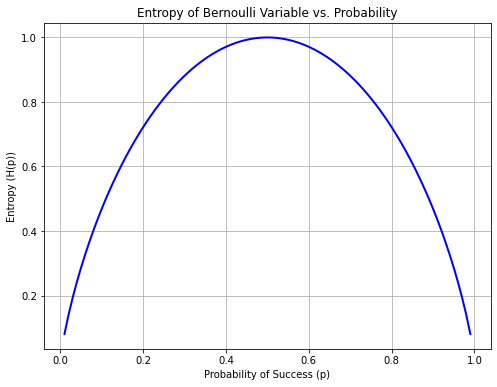

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of probabilities (p) for the Bernoulli variable
probabilities = np.linspace(0.01, 0.99, 100)  # From 0.01 to 0.99 with 100 points

# Calculate entropy for each probability
entropy = - (probabilities * np.log2(probabilities) + (1 - probabilities) * np.log2(1 - probabilities))

# Create the entropy plot
plt.figure(figsize=(8, 6))
plt.plot(probabilities, entropy, 'b-', lw=2)
plt.xlabel('Probability of Success (p)')
plt.ylabel('Entropy (H(p))')
plt.title('Entropy of Bernoulli Variable vs. Probability')
plt.grid(True)

# Show the plot
plt.show()


The diagram above illustrates that entropy is maximum for $p=0.5$, which is coherent with our intuitive understanding of entropy.

## Other Concepts (Optional)

### Joint Entropy and Conditional Entropy

Given two random variables $X$ and $Y$, we can define the **joint entropy** as:

$$H(X,Y) = -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x,y) \log p(x,y)$$

We will define the **conditional entropy** as follows:

$$H(X|Y) = -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x,y) \log p(x|y)$$

The conditional entropy measures the uncertainty over $X$ when $Y$ is known.

### Kullback-Leibler Divergence

The Kullback-Leibler divergence (also called KL-divergence) is a statistical distance measure which can be used to quantify the distance between two probability distributions (i.e., how much different they are from one another). For discrete probability distributions, this is defined as:

$$D_{KL}(P || Q) = \sum_{x \in \chi} P(x)\log\left(\frac{P(x)}{Q(x)}\right)$$

where $P$ and $Q$ are the two distributions we want to compare and $\chi$ is the sample space of such distributions. In practice, it is **the expectation under the distribution P of the logarithmic difference ($\log\frac{P(x)}{Q(x)} = \log P(x)-\log Q(x)$) between the values of $P(x)$ and $Q(x)$.** 

The KL divergence measures the **inefficiency of assuming that the distribution is $q$ when the true distribution is $p$**.

 **It should be noted that this distance measure is not symmetric.**

 For two continuous densities $p$ and $q$:

 $$D_{KL}(p || q) = \int_{\chi} p(x)\log\frac{p(x)}{q(x)}dx$$

 The KL divergence is also called **relative entropy**.


### Mutual Information
Let us consider two random variables $X$ and $Y$ with a joint probability function $P(X,Y)$. We define the **mutual information** $I(X;Y)$ as the **relative entropy** between the joint distribution and the product distribution:

$$I(X;Y) = \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x,y) \log \frac{P(x,y)}{P(x)P(y)}$$

if the KL divergence measures the inefficiency of using $q$ when $p$ is the real distribution, the mutual information measures the inefficiency of using the product $P(x)P(y)$ instead of $P(x,y)$. As you may recall: 

$$P(X,Y)=P(X)P(Y) \Leftrightarrow X \perp Y $$

So:
* If the two variables are independent, then the mutual information will be equal to zero;
* If the two variables are dependent, then the mutual information will be larger than zero.

The mutual information allows to quantify how much information a variable will give about another one. **Note that the mutual information is symmetrical.**

It can be shown that:

$$I(X;Y) = H(X) - H(X|Y)$$

From which we observe that **the mutual information between two variables X and Y is the reduction in the uncertainty about one variable when the other one is known.**

### Data Processing Inequality

We will say that random variables $X$, $Y$, and $Z$ form a Markov Chain in that order (denoted as $X \to Y \to Z$) if we can write:

$$P(X,Y,Z) = P(Z|Y) P(Y|X) P(X)$$

which means that we can obtain $Y$ as a function of $X$ and $Z$ as a function of only $Y$ (without considering $X$ anymore). In some sense, $Y$ encodes whatever we need to encode about $X$.

Under these conditions, it can be proved that:

$$I(X;Y) \geq I(X;Z)$$

which is known as the **data processing inequality**.

This is a fundamental results for data analysis which tells us that, no matter what if $Y$ has been obtained from $X$ with some process which induces information loss, there is no way to recover the lost information from $Y$.

## References

-   Some parts of chapter 1 of \[3\].

\[3\] Cover, Thomas M., and Joy A. Thomas. *Elements of information
theory*. John Wiley & Sons, 2012.
